## RANDOM FOREST ALGORITHM


NAME: TIMILEYIN SAMUEL AKINTILO

STUDENT ID: C00302909

#### INTRODUCTION

This notebook showcases the implemention of the Random Forest algorithm using the scikit-learn library. This notebook was developed from the scratch to demostrate a significant practical and theoretical understanding of the underlying machine learning algorithm. 

#### LOG OF CHANGES

This log embodies all the computations carrried out for this analysis and how they affect result of the analysis. The log is structured to follows the Cross Industry Standard Process for Data Mining (CRISP-DM) model, and the changes were logged under each of the six phases as follows:

**1. Business understanding**

The analysis investigate the titanic event and aims to develop an model that helps to classify whether or not an individual on the titanic ship survives based on some certain features. 

**2. Data Understanding**

The dataset used for this analysis was gotten from kaggle (https://www.kaggle.com/datasets/yasserh/titanic-dataset). The dataset contains information about the passengers that boarded the ship including age, sex, embarked state, name, cabin number, ticket number, social-class, and survival status. With this passenger information, we will build a classifier that will classify if a passenger survived or not. 

Here is the data dictionary for the dataset:

Data Dictionary

survival: Survival (0 = No, 1 = Yes)

pclass:	Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)

sex:	Sex	

Age:	Age in year
	
sibsp:	No of siblings / spouses aboard the Titanic	

parch:	No of parents / children aboard the Titanic	

ticket:	Ticket number	

fare:	Passenger fare	

cabin:	Cabin number	

embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)


**3. Data Preparation**

In the data preprocessing stage, the following steps wer taken to make the data fit for modelling:

a) The missing values in each of the column were filled with the apprioprate values.

b) Categorical features were encoded into numeric featurs using Label Encoder.

c) Columns which have the tendency of not impacting the model were drop to simplify the analysis.



**4. Modelling**

The following  were implemented during the modelling phase:
**a) Standardizing the features**

**Change:** All the features were standardized to keep them within the same scale

**Result:** The accuracy of the model improved from 81% to 82%, whiile the precision and recall remained the same.

**b) Encoding the target variable**

**Change:** The categorical features were encoder into a numeric variable using a label encoder.

**Result:** This preprocessed the data, making it ready to be fit into the algorithm.

**c) Balancing the target variable**

**Change:** The target variable was slightly imbalanced, hence oversampling was done using SMOTE

**Result:** This  model's performance reduced a little bit. With oversampling the model had an accuracy of 82%, precision of 82%, recall of 88% and an f1-score of 85%, while with over sampling,  the model had an accuracy of 80%, precision of 84%, recall of 81% and an f1-score of 83%

**d) Using cross validation**

**Change:** The datset was splited into 5 folds via random sampling.

**Result:** This had little effect on the performance of the model as the model accuracy remained 82%.

**e) Examining different number of folds**

**Change:** A function was created to test different values of K, and examine the accuracy.

**Result:** The accuracy didn't change much when will alter the number of folds. 

**f) Hyperparameter tuning**

**Change:** The hyperparameters of the model were tune to improve the model's performance.

**Result:** The accuracy of the model of the model did not change significantly after hyperparameter tuning.

**g) Feature importance**

**Change:** Leveraging the feature importance method in Random forest, the features that impacted the model most were investigated

**Result:** The fare and sex feature were the most predictive features.

**4. Evaluation:**

The performance of the model was evaluated using various metric scores including accuracy, precision, recall and f1-score.


**5. Deployment:**

The best model was saved as a pickle file and was deployed as a web application which which runs locally. The name of the web app is titanic.


#### ANALYSIS

First things first, let's import the neccessary libraries.


#### 

In [806]:
import pickle
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


Next, we will load the data set and take a look at it.

In [807]:
# load the drug analysis dataset
df = pd.read_csv('Titanic-Dataset.csv')

In [808]:
# check the first few rows of the dataframe
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [809]:
# Examine the shape of the dataset
df.shape

(891, 12)

Now, we will check the distribution of the target variable

The distribution shows that the dataset is a bit imbalanced

In [810]:
# Examine the columns in the dataframe
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [811]:
# check for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Three of the columns have missing values. We will attempt to deal with these missing values before we proceed with the analysis.

In [812]:
# fill missing values in the Age column with the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [813]:
# fill missing values in the Embarked column with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

We will drop the Cabin column as it contains a lot of missing values and there is high probability that it will not be useful in our analysis.

In [814]:
# drop the Cabin column
df.drop('Cabin', axis=1, inplace=True)

Futhermore, we will drop the Name and Ticket columns as they are not useful for our analysis as they are unique to each passenger.

In [815]:
# drop the Name and Ticket columns
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

Let us see the resulting dataset after the data preprocessing

In [816]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Some of the columns are categorical, we need to convert them to numerical values. We can use the a label encoder to convert the categorical values to numerical values. 

In [817]:
# Select only categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category'])
categorical_columns.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [818]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Iterate through each column in the DataFrame and apply label encoding
for column in categorical_columns.columns:
    df[column] = label_encoder.fit_transform(df[column])

In [819]:
df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,1,27.000000,0,0,13.00,2
887,1,1,0,19.000000,0,0,30.00,2
888,0,3,0,29.699118,1,2,23.45,2
889,1,1,1,26.000000,0,0,30.00,0
890,0,3,1,32.000000,0,0,7.75,1


In [820]:
# Display the class labels
class_labels = label_encoder.classes_
print(f'Class Labels: {class_labels}')

Class Labels: ['C' 'Q' 'S']


Since Label encoder encodes based on alphabetical order, we can see that C is encoded as 0, Q as 1, S as 2. Aslo for the Sex column Female as 0 and Male as 1.

Great! Now that we have encoded the categorical columns, we can proceed to train a SVM classifier using the encoded data.

In [821]:
# Split the data into features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# take a copy of the features
features = X.copy()


In [822]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

Now, we can split the dataset into a training set and a test set. We will use 80% of the data for training and 20% for testing.

In [823]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [824]:
# Create a Random Forest Classifier instance
rf0 = RandomForestClassifier(random_state=42)

In [825]:
# Fit the model
rf0.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [826]:
# Make predictions on the test set
y_pred = rf0.predict(X_test)

In [827]:
# Check the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is {accuracy:.3f}")

The accuracy of the model is 0.810


In [828]:
# calculate the accuracy using confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[91, 14],
       [20, 54]], dtype=int64)

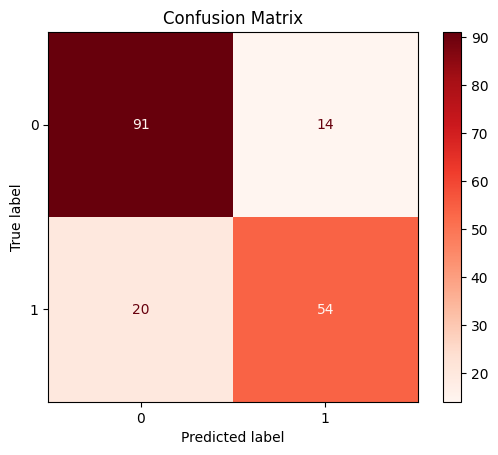

In [657]:
# Display the confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Reds', values_format='d', xticks_rotation='horizontal')
plt.title('Confusion Matrix')
plt.show()

In [658]:
# display the classification report
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



The model's accuracy is 0.81, which is quite good. Also, the precision, recall, and F1-score are 0.82, 0.87 and 0.84 respectively.

Next we will standardize the features using the StandardScaler class from the scikit-learn library and compare the results.

In [710]:
# standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

Now, we can split the standardized dataset into a training set and a test set. We will use 80% of the data for training and 20% for testing.

In [711]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [712]:
# Create a Random Forest Classifier instance
rf = RandomForestClassifier(random_state=42)

In [664]:
# Fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [665]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

In [666]:
# Check the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is {accuracy:.3f}")

The accuracy of the model is 0.816


In [667]:
# calculate the accuracy using confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[92, 13],
       [20, 54]], dtype=int64)

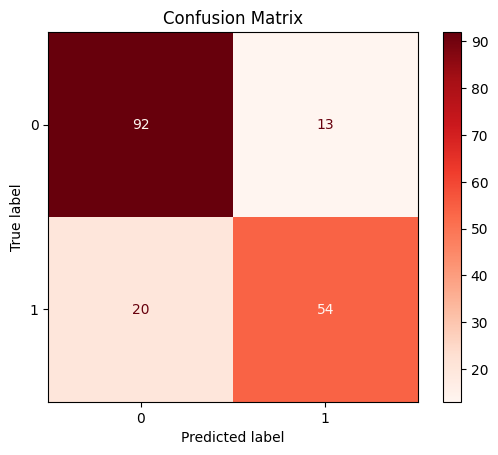

In [668]:
# Display the confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Reds', values_format='d', xticks_rotation='horizontal')
plt.title('Confusion Matrix')
plt.show()

In [669]:
# display the classification report
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



The model has an accuracy improved to 0.82, and a precision of 0.82, recall of 0.88 and an f1-score of 0.85

#### Balancing the target variable

Let is examine the distribution of the target variable visually using a bar chart.


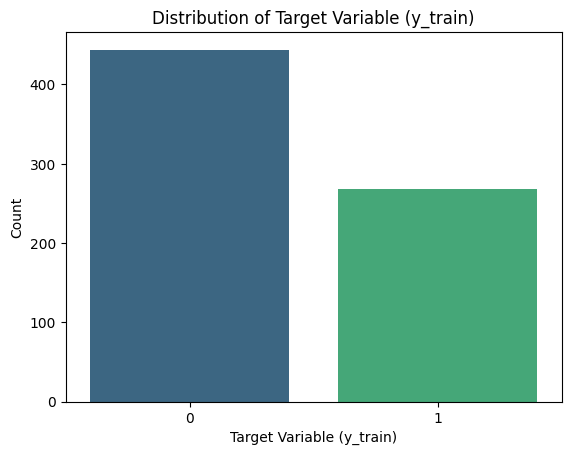

In [546]:
# Visualize the distribution of the target variable using a bar plot using matplotlib and seaborn

df = pd.DataFrame({'Target': y_train})

# Plotting the bar plot using Seaborn
sns.countplot(x='Target', data=df, hue='Target', palette='viridis', legend=False)
plt.xlabel('Target Variable (y_train)')
plt.ylabel('Count')
plt.title('Distribution of Target Variable (y_train)')
plt.show()


The target variable is unbalanced, so we need to balance it using the SMOTE technique.

In [722]:
# We will balance the dataset by using the SMOTE technique
smote = SMOTE(random_state=42)

In [723]:
# Fit the SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [724]:
# check the shape of the resampled and former data
X_train_smote.shape, y_train_smote.shape, X_train.shape, y_train.shape

((888, 7), (888,), (712, 7), (712,))

In [725]:
# Create a Random Forest Classifier instance
rf1 = RandomForestClassifier(random_state=42)

In [726]:
# Now we can train the model using the resampled data
rf1.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [727]:
# Make predictions on the test data
y_pred = rf1.predict(X_test)


In [728]:
# Check the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7988826815642458

In [729]:
# calculate the accuracy using confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[85, 20],
       [16, 58]], dtype=int64)

In [730]:
# display the classification report
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83       105
           1       0.74      0.78      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.79       179
weighted avg       0.80      0.80      0.80       179



The accuracy of the model reduced by 0.01 after balancing the dataset using the SMOTE technique. 

#### Using cross validation

Now, we will use cross-validation to evaluate the model's performance. This will be achieved by splitting the dataset into 5 folds and training the model on 4 folds and testing it on the remaining fold. This process will be repeated 5 times, with each fold serving as the test set once. The average accuracy of the model will be calculated.

In [556]:
# Create a Random Forest Classifier instance
rf2 = RandomForestClassifier()


In [557]:
# Use cross-validation to evaluate the model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [558]:
# Perform cross-validated scoring
cv_scores  = cross_val_score(rf2, X, y, scoring='accuracy', cv=cv)

In [559]:
# Print the cross-validated accuracy scores
print("Cross-validated Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

Cross-validated Accuracy Scores: [0.77653631 0.86516854 0.79213483 0.79775281 0.82022472]
Mean Accuracy: 0.8103634423451134


In [582]:
p = rf2.fit(X, y).predict([X_test[3]])
print(p)

[1]


There is no significal difference in the accuracy of the model after the cross-validation. The accuracy of the model remains 0.82

#### Create a function to perform cross-validation

In [560]:
def cross_val_accuracy(X, y, folds):
    
    rf3 = RandomForestClassifier(random_state=42)

    # Perform cross-validation and get accuracy scores for each fold
    accuracy_scores = cross_val_score(rf3, X, y, cv=folds)

    # Calculate mean accuracy
    mean_accuracy = np.mean(accuracy_scores)

    return accuracy_scores, mean_accuracy


In [561]:
# trying a range of folds
for i in range(2, 7):
    print(f'For {i} folds:')
    accuracy_scores, mean_accuracy = cross_val_accuracy(X, y, i)
    print(f'Accuracy scores: {accuracy_scores}')
    print(f'Mean accuracy: {mean_accuracy:.4f}')
    print('\n')


For 2 folds:
Accuracy scores: [0.77130045 0.78426966]
Mean accuracy: 0.7778


For 3 folds:
Accuracy scores: [0.77104377 0.81818182 0.8013468 ]
Mean accuracy: 0.7969


For 4 folds:
Accuracy scores: [0.76681614 0.83856502 0.80269058 0.81081081]
Mean accuracy: 0.8047


For 5 folds:
Accuracy scores: [0.79329609 0.82022472 0.84831461 0.7752809  0.83146067]
Mean accuracy: 0.8137


For 6 folds:
Accuracy scores: [0.7852349  0.79865772 0.87248322 0.82432432 0.7972973  0.85135135]
Mean accuracy: 0.8216




The above result shows that the model's accuracy is consistent across different folds. This is a good sign that the model is not overfitting to the training data.

#### Hyperparameter tuning

Now we will attempt to tune the hyperparameters of the Random Forest model using GridSearchCV

In [562]:
rf4 = RandomForestClassifier(random_state=42)

In [563]:
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [564]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

In [565]:
# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [566]:
# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [567]:
# check the best parameters
best_params

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_split': 10,
 'n_estimators': 200}

In [568]:
# Use the best model to make predictions
y_pred = best_estimator.predict(X_test)

In [569]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy:.4f}')

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 0.8212


Now we will check the feature importances to see which features are most important in the model

In [570]:
# Checking feature importance
feature_importances = best_estimator.feature_importances_
feature_importances

array([0.11626019, 0.3318485 , 0.18703872, 0.05657481, 0.04272091,
       0.23224401, 0.03331285])

In [571]:
features.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [572]:
# create a dataframe of the feature importances and column names
feature_importances_df = pd.DataFrame({'Feature_importance': feature_importances, 'Feature': features.columns})
feature_importances_df

,Feature_importance,Feature
0,0.116260,Pclass
1,0.331849,Sex
2,0.187039,Age
3,0.056575,SibSp
4,0.042721,Parch
5,0.232244,Fare
6,0.033313,Embarked


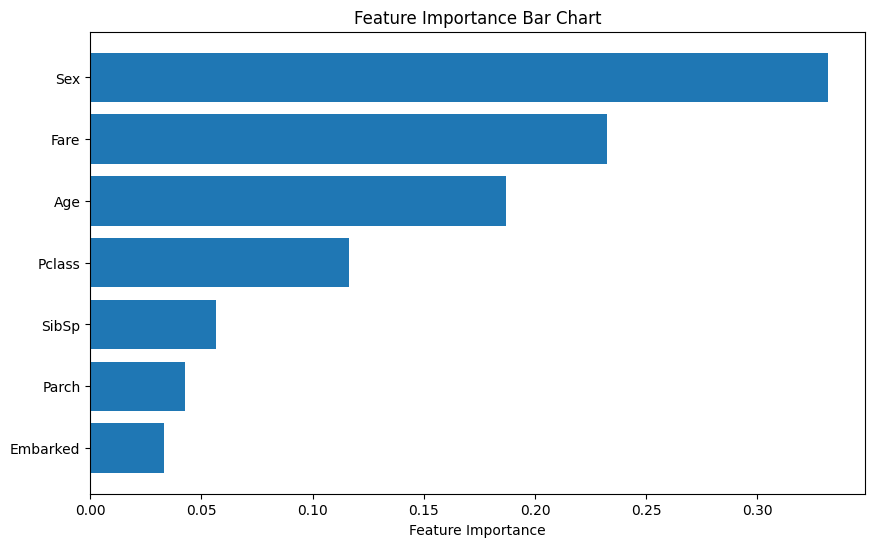

In [573]:
# Sort the DataFrame by Importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Feature_importance', ascending=True)


# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Feature_importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance Bar Chart')
plt.show()

As seen from the bar chart, the most important features are Fare and Age.

In [721]:
# Save the model to a file using pickle
with open('rfm.pkl', 'wb') as file:
    pickle.dump(rf0, file)

BIBLIOGRAPHY

https://www.kaggle.com/datasets/yasserh/titanic-dataset